# The goal of the project

## Business Object

* to help the company generate incremedntal sales by implementing a recommender system.

## Technical Object

* to recommend relevant products for users, based on their preferences. 
* preference and relevance are subjective, and they are generally infered by items users have consumed previously.

# Loading data

* In this section, we load the dataset, which is a horizontal merger of customer\product\order datasets. In this dataset, 3054 customers totally consume  4194 orders on 1753 products.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [2]:
df = pd.read_csv('data.csv',encoding='iso-8859-1')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
5,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,peggy,thompson,NaN,1388155947,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF01527,0.0,NaN
8,8,Randy,Pruss,NaN,1389303216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04706,0.0,NaN
9,10,Tommy,Smith,NaN,1390509516,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4194, 181)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
print('# products: %d' % df['Order_Items.product_id'].nunique())

print('# customers: %d' % df['Customers.id'].nunique())


# products: 1753
# customers: 3054


In [7]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [8]:
order_cols = [col for col in df if col.startswith('Order')]

In [9]:
order_cols

['Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.sales_rep',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.gift_id',
 'Orders.gift_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.shipping_trans',
 'Orders.shipping_flags',
 'Orders.weight',
 'Orders.tracking',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_user',
 'Orders.payment_type',
 'Orders.payment_method',
 'Orders.payment_amount',
 'Orders.purchase_order',
 'Orders.payment_id',
 'Orders.payment_code',
 'Orders.payment_ref',
 'Orders.status',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date',
 'Orders.comments

In [10]:
customer_col = [col for col in df if col.startswith('Customers')]

customer_col

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.reminders',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Customers.last_modified',
 'Customers.customer_type']

In [11]:
product_col = [col for col in df if col.startswith('Products')]

product_col

['Products.id',
 'Products.status',
 'Products.product_type',
 'Products.template',
 'Products.vendor',
 'Products.import_id',
 'Products.name',
 'Products.display_name',
 'Products.menu_name',
 'Products.list_price',
 'Products.price',
 'Products.sale_price',
 'Products.cost',
 'Products.flags',
 'Products.left_flag',
 'Products.right_flag',
 'Products.last_modified',
 'Products.taxable',
 'Products.shopping_gtin',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_gender',
 'Products.shopping_color',
 'Products.shopping_age',
 'Products.shopping_flags',
 'Products.amazon_asin',
 'Products.amazon_type',
 'Products.amazon_item_type',
 'Products.amazon_price',
 'Products.google_shopping_id',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Products.google_adwords',
 'Products.shopping_cat',
 'Products.shopping_type',
 'Products.pricegrabber_cat',
 'Products.shopzilla_cat',
 'Products.thefind_cat',
 'Products.quickbooks_id',
 'Products.qb_edit_s

# Data Scrubbing(cleaning and filtering)

## Checking missing values

In [12]:
missingData = df.columns[df.isnull().any()].tolist()
len(missingData)

161

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

### Missing value visualization

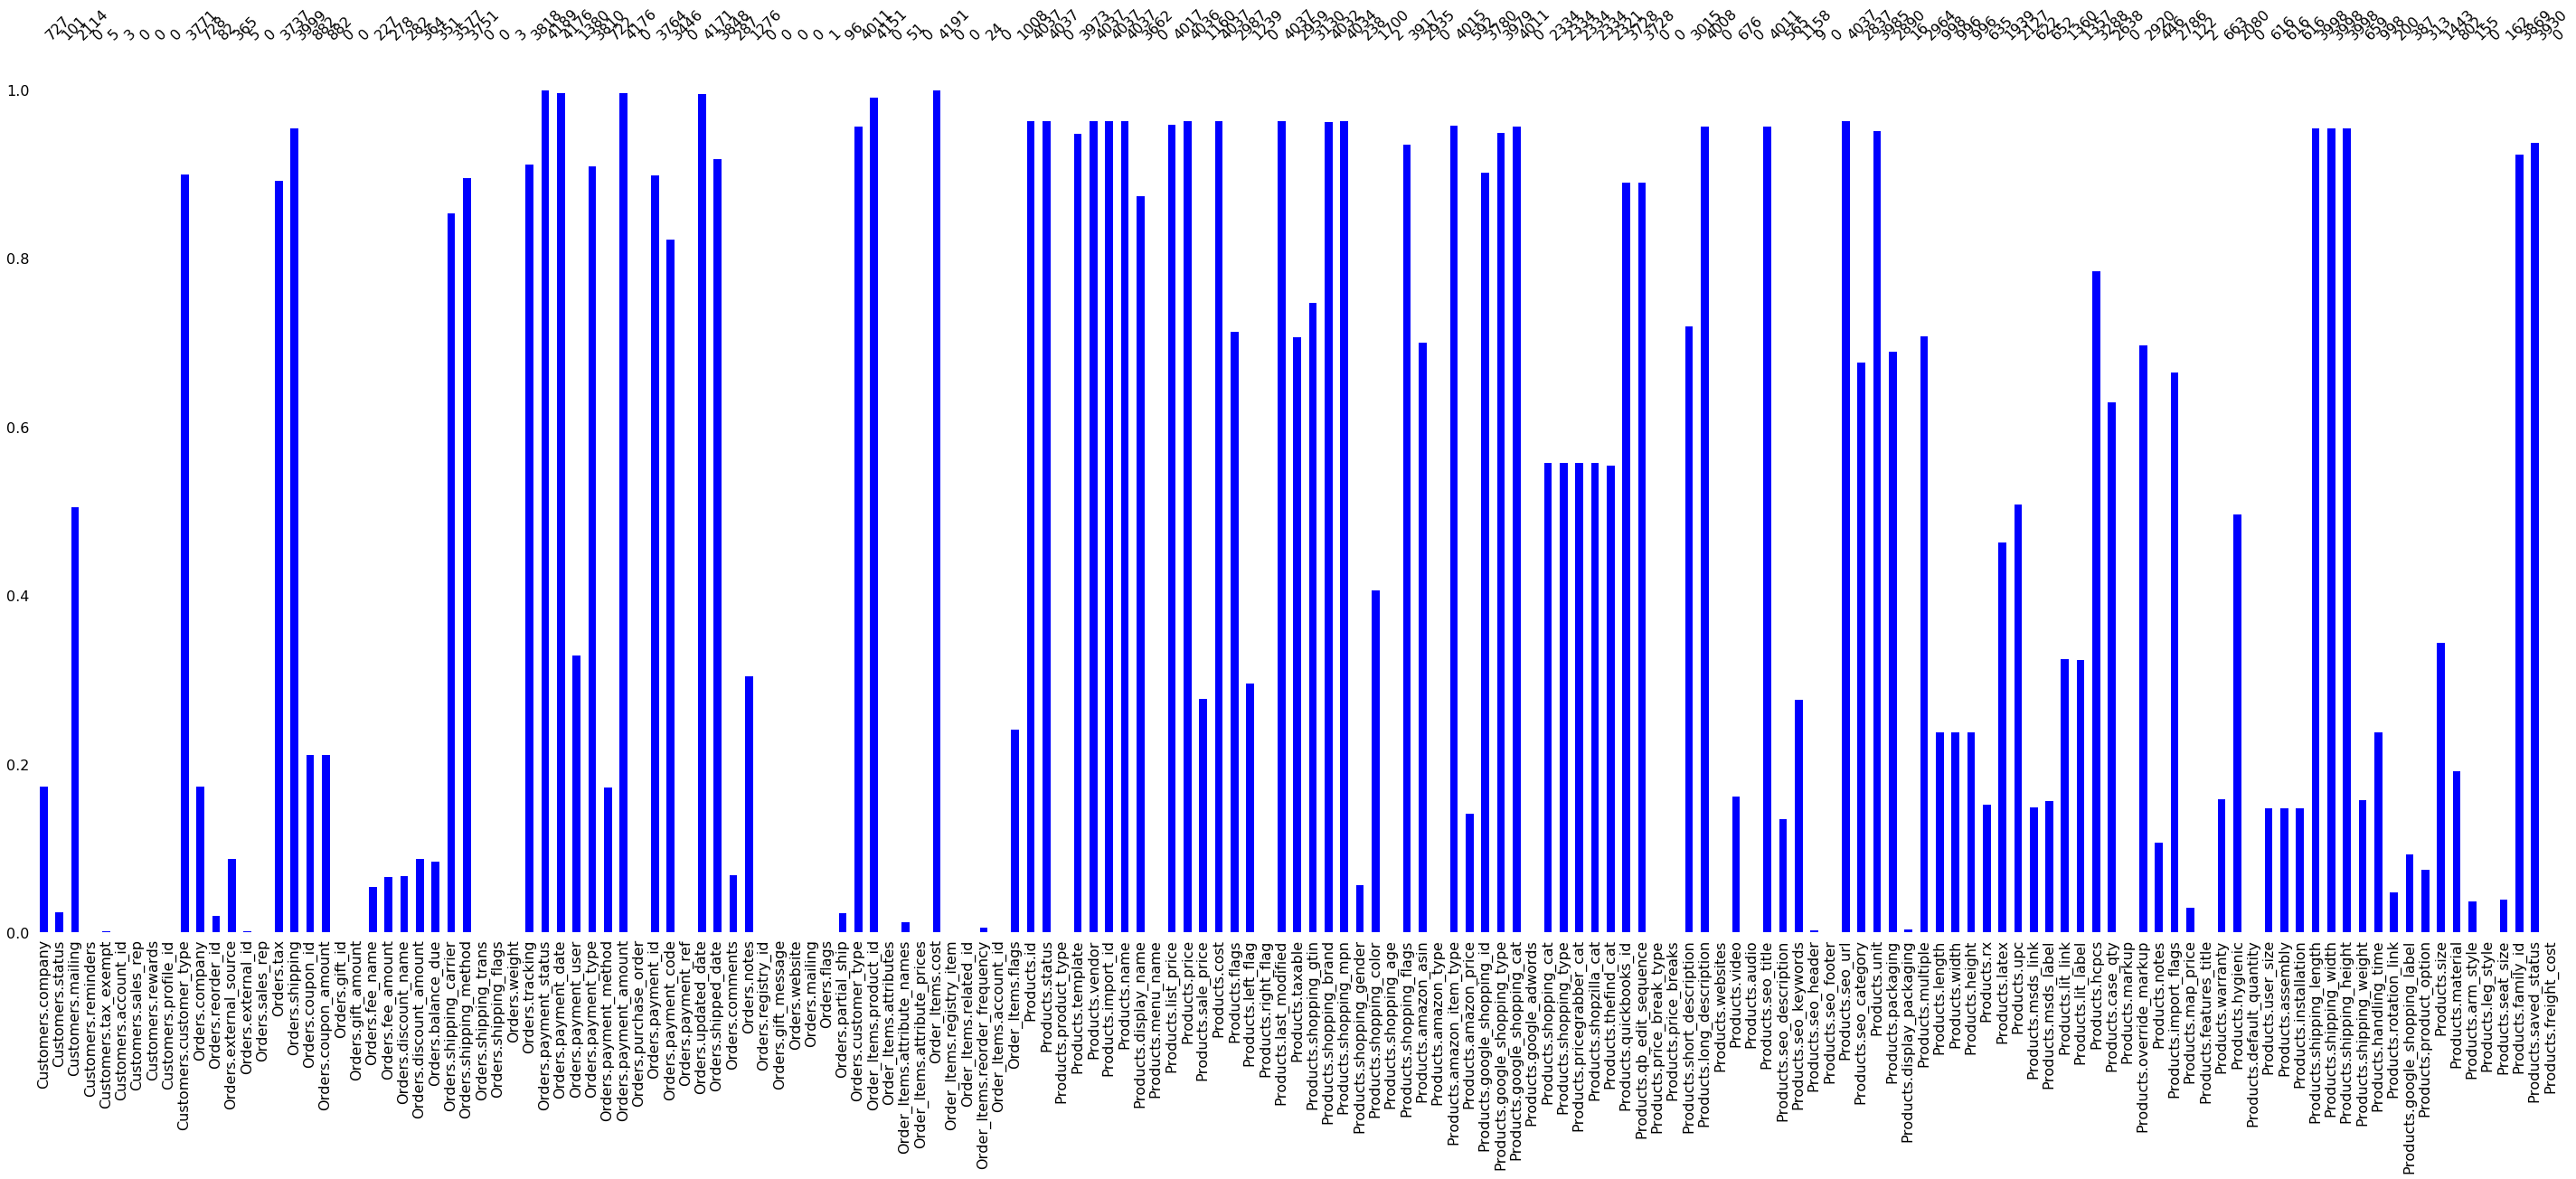

In [14]:
msno.bar(df[missingData],color='blue',log=False, figsize=(50,18))

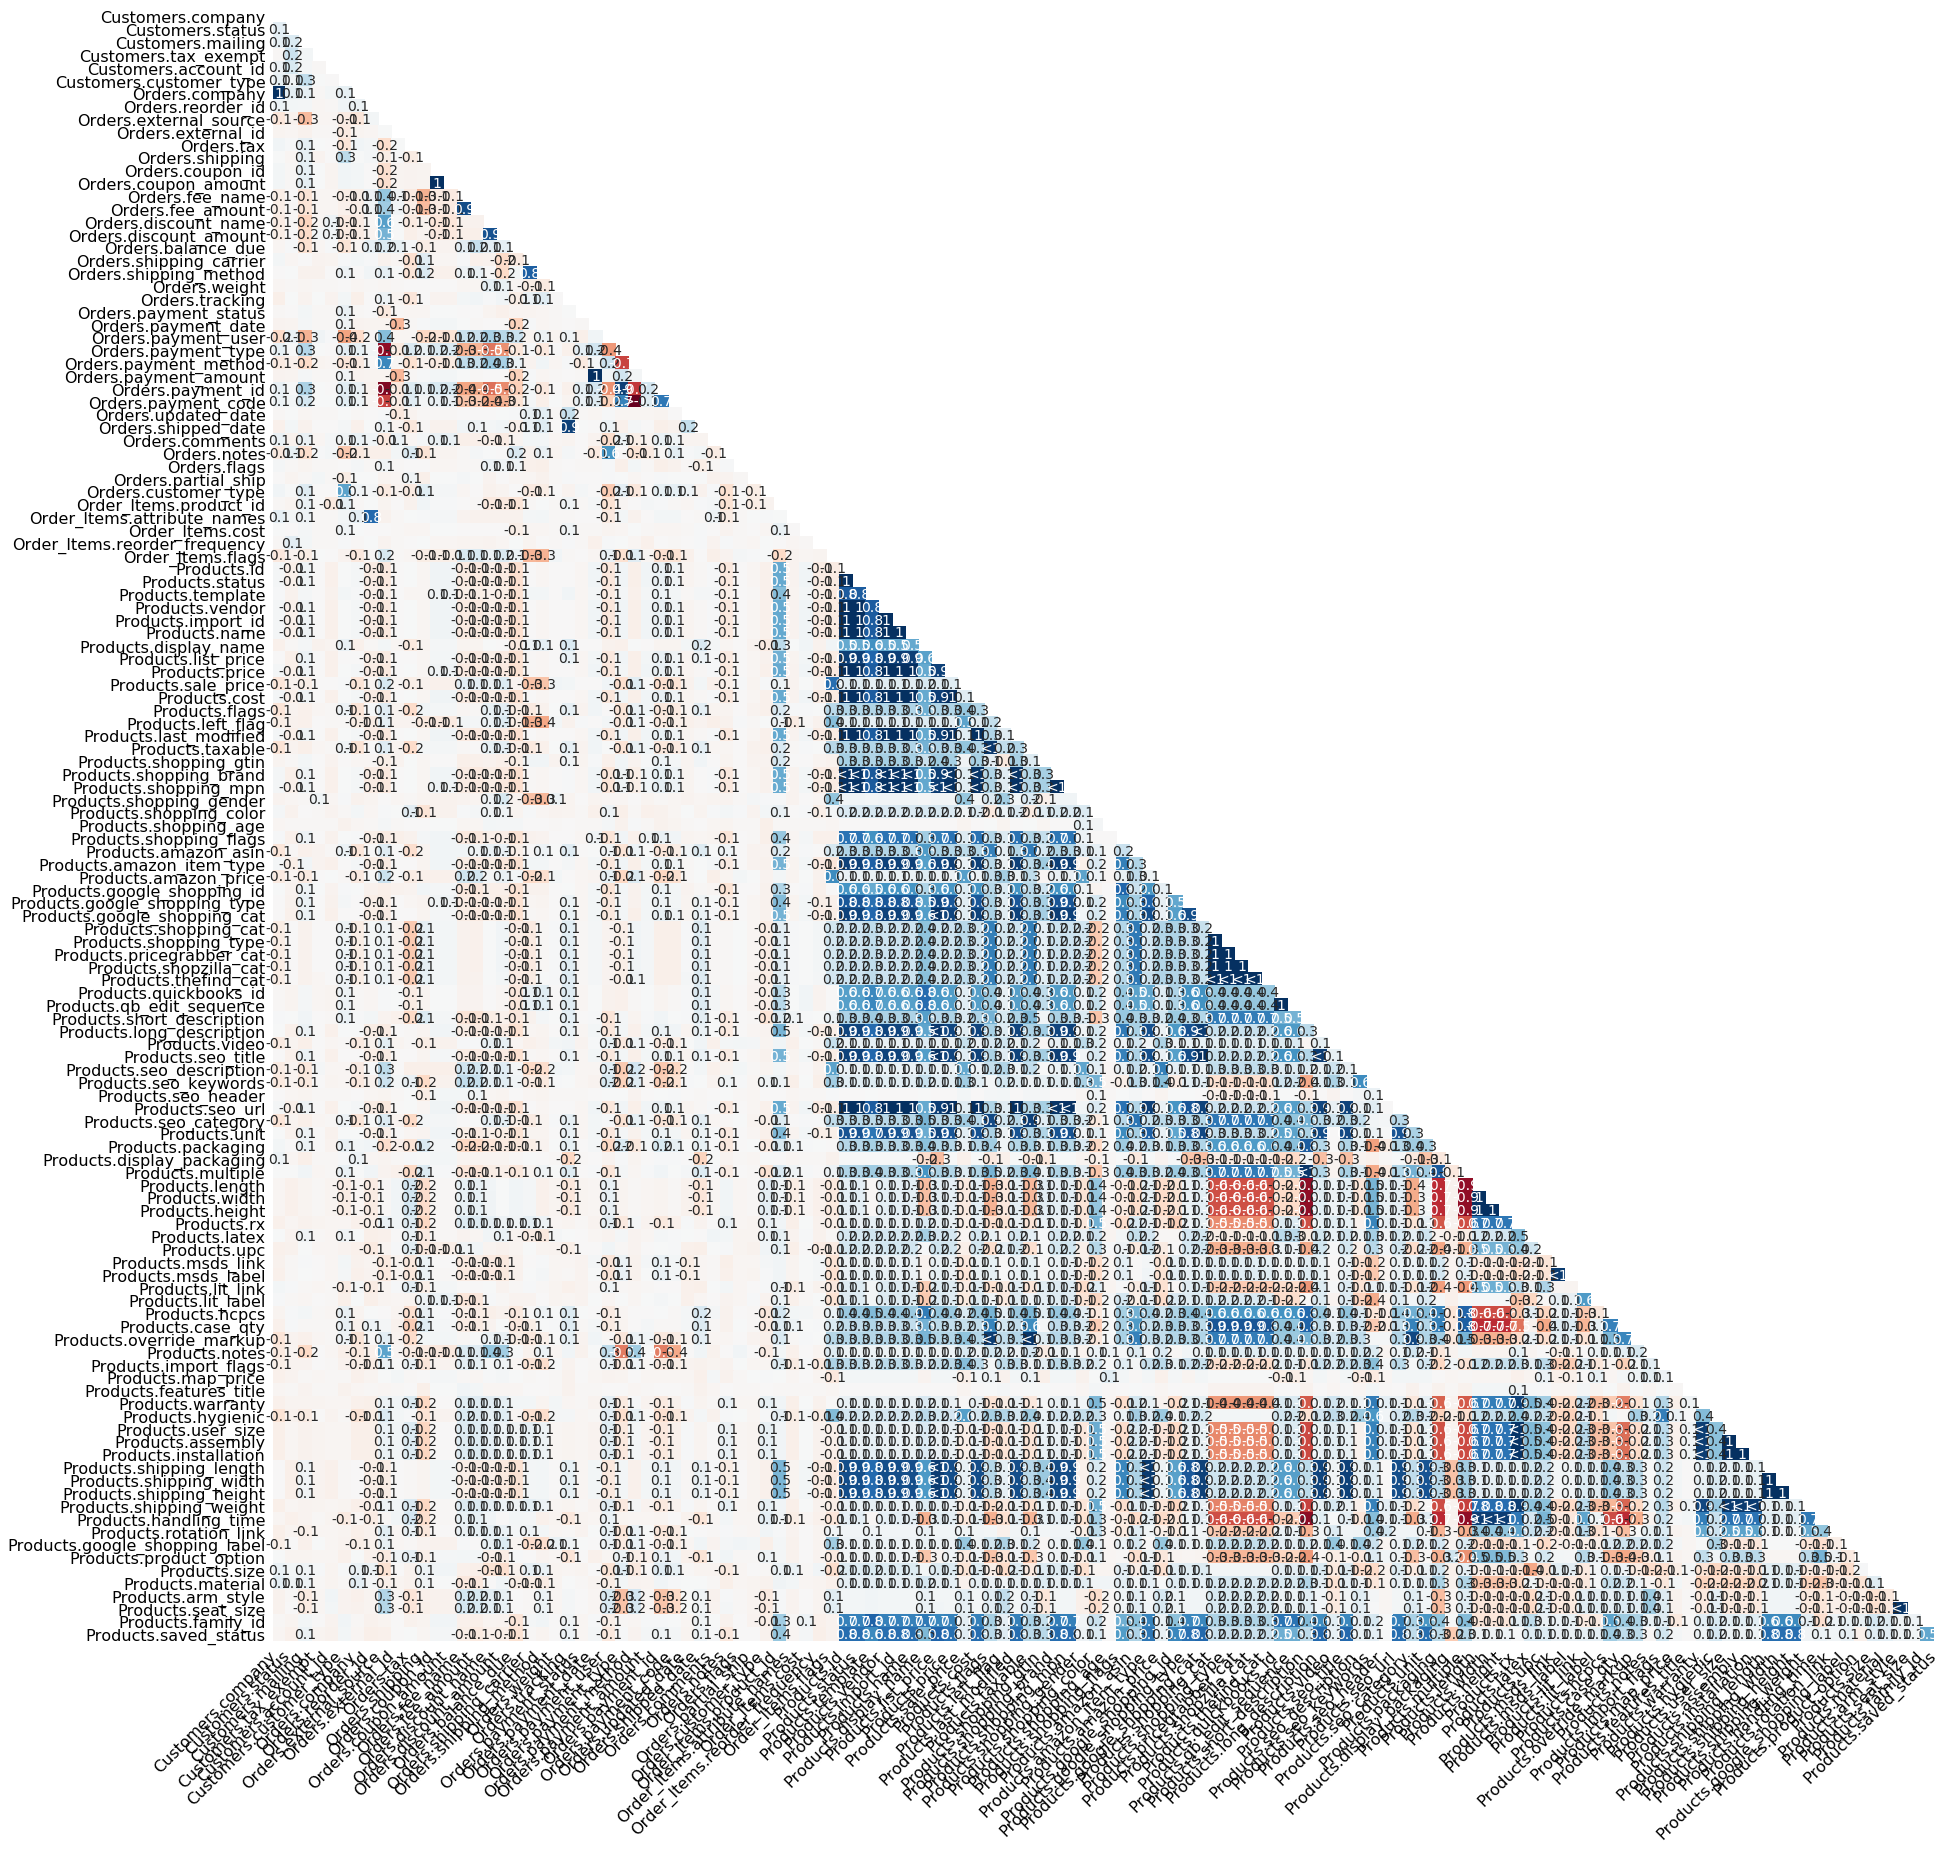

In [15]:
msno.heatmap(df[missingData],figsize=(30,30))

### Missing percentage

In [16]:
s = df.isnull().mean()

In [17]:
s

Customers.id                      0.000000
Customers.fname                   0.000000
Customers.lname                   0.000000
Customers.company                 0.826657
Customers.create_date             0.000000
Customers.status                  0.975918
Customers.mailing                 0.495947
Customers.reminders               1.000000
Customers.tax_exempt              0.998808
Customers.account_id              0.999285
Customers.sales_rep               1.000000
Customers.rewards                 1.000000
Customers.profile_id              1.000000
Customers.last_modified           0.000000
Customers.customer_type           0.100858
Orders.id                         0.000000
Orders.customer_id                0.000000
Orders.fname                      0.000000
Orders.lname                      0.000000
Orders.company                    0.826419
Orders.order_number               0.000000
Orders.reorder_id                 0.980448
Orders.external_source            0.912971
Orders.exte

In [18]:
missingcol = []
for a in s.index:
    if s[a]<1:
        missingcol.append(a)

In [19]:
missing_percentage = (len(missingcol)/len(s))*100
missing_percentage

81.21546961325967

## Choosing the features we need

80% more of the columns have missing data, but we don't need to fill them all. Let's first choose those columns that we need to compute the project.

In [20]:
df1 = df[['Customers.id', 
             'Order_Items.product_name', 
             'Order_Items.qty',\
             'Order_Items.price', 
             'Order_Items.cost', 'Orders.shipping',\
             'Orders.total',\
          'Order_Items.product_id',\
             'Orders.company',\
             'Products.long_description']]

In [21]:
df1.head()

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description
0,797,"Basic Rollators, Green",1,57.20,44.00,9.95,64.29,2310.0,Company0,"<ul><li> Classically designed, value priced</..."
1,3,"Urinary Drain Bags,0.000",4,5.00,1.87,9.99,29.99,177.0,Company1,<ul><li> Only Medline drain bags have a slide...
2,3,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,9.95,78.73,1.0,Company1,<ul><li> SensiCare&reg; nitrile exam gloves fe...
3,4,Basket for 2-Button Walkers,1,19.56,12.62,9.95,29.55,983.0,NaN,<ul><li> This wire basket attaches to almost a...
4,5,Tens Units,1,36.05,25.75,9.95,46.00,991.0,Company3,<ul><li> The TENS 3000<sup>TM</sup> analog uni...


In [22]:
df1.shape

(4194, 10)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
Customers.id                 4194 non-null int64
Order_Items.product_name     4194 non-null object
Order_Items.qty              4194 non-null int64
Order_Items.price            4194 non-null float64
Order_Items.cost             4191 non-null float64
Orders.shipping              3999 non-null float64
Orders.total                 4194 non-null float64
Order_Items.product_id       4151 non-null float64
Orders.company               728 non-null object
Products.long_description    4008 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 327.7+ KB


In [24]:
df1.isnull().mean()

Customers.id                 0.000000
Order_Items.product_name     0.000000
Order_Items.qty              0.000000
Order_Items.price            0.000000
Order_Items.cost             0.000715
Orders.shipping              0.046495
Orders.total                 0.000000
Order_Items.product_id       0.010253
Orders.company               0.826419
Products.long_description    0.044349
dtype: float64

## Filling null values

### Filling 'products.long_description' with 'product_name'

In [25]:
df1[df1['Products.long_description'].isnull()==True].head()

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description
5,5,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,9.95,54.41,310.0,Company3,NaN
6,5,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...",1,14.63,8.36,9.95,24.58,799.0,Company3,NaN
9,10,Drive medical excersize paddler item #RTL10273,1,34.00,34.00,9.95,34.00,NaN,NaN,NaN
10,11,Drive Medical item # RTL10273,1,34.00,34.00,9.95,34.00,NaN,NaN,NaN
15,14,"Geo Mattress Max 80"" X 35""",1,339.99,339.99,9.99,349.98,2290.0,NaN,NaN


In [26]:
df1['Products.long_description'].fillna(df1['Order_Items.product_name'],inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Filling Items.cost by conduct the formular

* df1['Order_Items.cost']=(df1['Orders.total']-df1['Orders.shipping'])/df1['Order_Items.qty']

In [27]:
df1[df1['Order_Items.cost'].isnull()==True]

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description
2373,1996,CURAD Powder-Free Latex-Free 3G Vinyl Exam Glo...,2,47.82,NaN,9.95,191.16,148.0,NaN,"<ul><li> These soft, comfortable third genera..."
4023,3564,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,NaN,9.95,127.29,16476.0,NaN,<p>Hand pump can be used to manually inflate a...
4050,3595,"BUCKET, REPLACEMENT FOR MDS89668XW",1,44.00,NaN,9.95,53.95,NaN,NaN,"BUCKET, REPLACEMENT FOR MDS89668XW"


In [28]:
df1['Order_Items.cost'].fillna((df1['Orders.total']-df1['Orders.shipping'])/df1['Order_Items.qty'],inplace=True)

In [29]:
df1[df1['Order_Items.cost'].isnull()==True]

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description


In [30]:
df1.loc[2373,'Order_Items.cost']==(191.16-9.95)/2

True

## Create new column named Order_Items.profit

In [31]:
df1['Order_Items.profit']=(df1['Order_Items.price']-df1['Order_Items.cost'])*df1['Order_Items.qty']

df1.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description,Order_Items.profit
0,797,"Basic Rollators, Green",1,57.20,44.00,9.95,64.29,2310.0,Company0,"<ul><li> Classically designed, value priced</...",13.20
1,3,"Urinary Drain Bags,0.000",4,5.00,1.87,9.99,29.99,177.0,Company1,<ul><li> Only Medline drain bags have a slide...,12.52
2,3,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,9.95,78.73,1.0,Company1,<ul><li> SensiCare&reg; nitrile exam gloves fe...,16.28
3,4,Basket for 2-Button Walkers,1,19.56,12.62,9.95,29.55,983.0,NaN,<ul><li> This wire basket attaches to almost a...,6.94
4,5,Tens Units,1,36.05,25.75,9.95,46.00,991.0,Company3,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,10.30


## Deskew for Order_Items.qty column

* now let's take a look at the whole datafile. what I noticed is the Order_Items.qty column is skewed, I'll take a log on it.

In [32]:
pandas_profiling.ProfileReport(df1)

Number of variables,11
Number of observations,4194
Total Missing (%),8.0%
Total size in memory,360.5 KiB
Average record size in memory,88.0 B
Numeric,7
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [35]:
df1['Order_Items.qty'] = np.log(1+df1['Order_Items.qty'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Text cleaning for Products.long_description and Order_Items.product_name columns

In [36]:
import re

def preprocess_text(text):
    
    # remove all the non letter characters including numbers
    text = re.sub("[^a-zA-Z]", " ", str(text))
    # reduce duplicated letters to 2
    text = re.sub(r'(.)\1+', r'\1\1',str(text))
    # remove single letter
    text = ' '.join( [w for w in str(text).lower().split() if len(w)>2] )
    return text.strip()

In [37]:
df1['Order_Items.product_name']=df1['Order_Items.product_name'].apply(preprocess_text)

df1['Products.long_description']=df1['Products.long_description'].apply(preprocess_text)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Exploratory Data Analysis

## Product_id and Product_name

* we have 1778 product names, wheres just 1753 product ids. Which means for each product name, we have different ids for it.

In [38]:
df1['Order_Items.product_id'].nunique()

1753

In [39]:
df1['Order_Items.product_name'].nunique()

1615

In [40]:
ser=df1.groupby('Order_Items.product_id')['Order_Items.product_name'].size()

In [41]:
df1[df1['Order_Items.product_id']==305.0]

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description,Order_Items.profit
247,242,extrasorbs air permeable disposable drypads,0.693147,105.85,84.01,9.95,115.80,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
248,242,extrasorbs air permeable disposable drypads white,0.693147,105.85,84.01,9.95,115.80,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
249,242,extrasorbs air permeable disposable drypads,0.693147,105.85,84.01,9.95,115.80,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
250,242,extrasorbs air permeable disposable drypads white,0.693147,105.85,84.01,9.95,115.80,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
251,242,extrasorbs air permeable disposable drypads white,0.693147,105.85,84.01,9.95,115.80,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
252,242,extrasorbs air permeable disposable drypads white,0.693147,105.85,84.01,0.00,105.85,305.0,NaN,air permeable moisture proof backsheet provide...,21.84
253,242,extrasorbs air permeable disposable drypads white,0.693147,115.93,84.01,0.00,104.34,305.0,NaN,air permeable moisture proof backsheet provide...,31.92
254,242,extrasorbs air permeable disposable drypads white,0.693147,115.93,84.01,9.95,125.88,305.0,NaN,air permeable moisture proof backsheet provide...,31.92
255,242,extrasorbs air permeable disposable drypads white,0.693147,115.93,84.01,0.00,115.93,305.0,NaN,air permeable moisture proof backsheet provide...,31.92
2496,2108,extrasorbs air permeable disposable drypads white,1.098612,115.93,84.01,9.95,368.74,305.0,NaN,air permeable moisture proof backsheet provide...,63.84


In [42]:
ser[ser>1]

Order_Items.product_id
19.0        2
20.0        2
26.0        3
28.0        7
29.0       10
30.0        3
62.0        3
80.0        2
87.0        2
100.0       5
137.0       2
139.0       2
153.0       5
163.0       2
168.0       3
174.0       5
236.0       2
243.0       2
248.0       3
254.0       2
256.0       9
260.0       2
263.0       3
264.0       7
267.0       6
269.0       2
270.0       7
276.0       2
303.0       3
305.0      13
           ..
17142.0     3
17147.0     4
17148.0     2
17175.0     6
17766.0     3
17767.0     2
17844.0     2
17850.0     2
18122.0     2
18124.0     6
18141.0     2
18235.0     3
18248.0     2
18252.0     2
18286.0     2
18342.0     3
18354.0     2
18376.0     2
18511.0     2
18513.0     4
18522.0     3
18534.0     3
18535.0     8
21639.0     2
21919.0     2
21921.0     6
21950.0    13
24416.0     2
24422.0     2
25003.0     2
Name: Order_Items.product_name, Length: 690, dtype: int64

In [43]:
df1.head()

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.shipping,Orders.total,Order_Items.product_id,Orders.company,Products.long_description,Order_Items.profit
0,797,basic rollators green,0.693147,57.20,44.00,9.95,64.29,2310.0,Company0,classically designed value priced constructed ...,13.20
1,3,urinary drain bags,1.609438,5.00,1.87,9.99,29.99,177.0,Company1,only medline drain bags have slide tap for eas...,12.52
2,3,sensicare nitrile exam gloves blue large,0.693147,68.78,52.50,9.95,78.73,1.0,Company1,sensicare reg nitrile exam gloves feature depe...,16.28
3,4,basket for button walkers,0.693147,19.56,12.62,9.95,29.55,983.0,NaN,this wire basket attaches almost any walker me...,6.94
4,5,tens units,0.693147,36.05,25.75,9.95,46.00,991.0,Company3,the tens sup sup analog unit uses microprocess...,10.30


## Exploration on company

In [44]:
df_company = df1.groupby('Orders.company').agg({'Orders.total':sum, 'Order_Items.qty':sum, 'Order_Items.profit':sum})

### Company which bring the most profit

In [45]:
df_company.sort_values('Order_Items.profit',ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Orders.company,,,
Company59,12790.69,48.099079,4091.94
Company343,4987.50,7.297091,1549.45
Company145,8530.28,18.714974,705.16
Company86,1925.05,25.829553,685.65
Company130,7330.23,24.527846,615.53
Company207,9502.36,6.214608,494.57
Company281,5705.88,9.765604,479.10
Company171,3297.56,17.455788,464.75
Company159,8452.78,14.443611,422.51


### Company which made the most amount of purchase

In [46]:
df_company.sort_values('Orders.total',ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Orders.company,,,
Company59,12790.69,48.099079,4091.94
Company207,9502.36,6.214608,494.57
Company145,8530.28,18.714974,705.16
Company159,8452.78,14.443611,422.51
Company130,7330.23,24.527846,615.53
Company89,5713.08,10.771176,414.24
Company281,5705.88,9.765604,479.10
Company343,4987.50,7.297091,1549.45
Company291,3973.14,3.465736,332.48


### Company which ordered the most amount of Items by volum.

In [47]:
df_company.sort_values('Order_Items.qty',ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Orders.company,,,
Company59,12790.69,48.099079,4091.94
Company86,1925.05,25.829553,685.65
Company130,7330.23,24.527846,615.53
Company145,8530.28,18.714974,705.16
Company171,3297.56,17.455788,464.75
Company159,8452.78,14.443611,422.51
Company52,1364.43,13.117680,200.40
Company6,1361.15,11.156022,220.10
Company89,5713.08,10.771176,414.24


## Exploration on Customer

In [48]:
df_customer = df1.groupby('Customers.id').agg({'Orders.total':sum, 'Order_Items.qty':sum,'Order_Items.profit':sum})

### Customer which bring the most profit

In [49]:
df_customer.sort_values('Order_Items.profit', ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Customers.id,,,
1352,10007.48,34.339872,3222.00
442,5093.30,8.347827,1724.80
3006,4987.50,7.297091,1549.45
1043,15228.95,41.081391,1048.89
3234,2588.00,3.044522,960.00
699,2783.21,13.759207,869.94
1616,8530.28,18.714974,705.16
973,1925.05,25.829553,685.65
403,4419.01,25.189993,679.52


### Which customer made the most amount of purchases?

In [50]:
df_customer.sort_values('Orders.total', ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Customers.id,,,
1043,15228.95,41.081391,1048.89
1352,10007.48,34.339872,3222.00
2022,9502.36,6.214608,494.57
1616,8530.28,18.714974,705.16
1730,8452.78,14.443611,422.51
2710,8119.38,4.158883,274.76
1420,7330.23,24.527846,615.53
2539,6053.76,2.079442,612.24
985,5713.08,10.771176,414.24


### Customer which ordered the most amount of Items by volum.

In [51]:
df_customer.sort_values('Order_Items.qty',ascending=False)[:10]

,Orders.total,Order_Items.qty,Order_Items.profit
Customers.id,,,
1043,15228.95,41.081391,1048.89
1371,5428.15,35.613174,643.64
1352,10007.48,34.339872,3222.00
851,2627.09,29.244263,664.59
515,4383.37,25.999795,581.00
973,1925.05,25.829553,685.65
403,4419.01,25.189993,679.52
1420,7330.23,24.527846,615.53
581,3568.99,21.476269,383.93


## Which product is the most popular one?

In [55]:
df_product = df1.groupby('Order_Items.product_id').agg({'Order_Items.qty':sum, 'Orders.total':sum,'Order_Items.profit':sum})

### Criteria on profit

In [59]:
df_product.sort_values('Order_Items.profit',ascending=False).head()

,Order_Items.qty,Orders.total,Order_Items.profit
Order_Items.product_id,,,
1846.0,52.455788,13442.16,4253.04
2107.0,91.064869,13606.61,2295.94
911.0,46.846326,9181.77,1853.00
910.0,46.846326,9049.58,1824.49
1672.0,8.347827,5093.30,1724.80


### Criteria on amount of products ordered by volumn

In [61]:
df_product.sort_values('Order_Items.qty',ascending=False).head()

,Order_Items.qty,Orders.total,Order_Items.profit
Order_Items.product_id,,,
2107.0,91.064869,13606.61,2295.94
1842.0,70.310227,2223.86,590.82
1846.0,52.455788,13442.16,4253.04
910.0,46.846326,9049.58,1824.49
911.0,46.846326,9181.77,1853.00


### Criteria on total amount of purchase.

In [62]:
df_product.sort_values('Orders.total',ascending=False).head()

,Order_Items.qty,Orders.total,Order_Items.profit
Order_Items.product_id,,,
2107.0,91.064869,13606.61,2295.94
1846.0,52.455788,13442.16,4253.04
911.0,46.846326,9181.77,1853.00
910.0,46.846326,9049.58,1824.49
858.0,37.665514,7512.06,1050.94


# Saving data for further use

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 11 columns):
Customers.id                 4194 non-null int64
Order_Items.product_name     4194 non-null object
Order_Items.qty              4194 non-null float64
Order_Items.price            4194 non-null float64
Order_Items.cost             4194 non-null float64
Orders.shipping              3999 non-null float64
Orders.total                 4194 non-null float64
Order_Items.product_id       4151 non-null float64
Orders.company               728 non-null object
Products.long_description    4194 non-null object
Order_Items.profit           4194 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 360.5+ KB


In [64]:
df1=df1[df1['Order_Items.product_id'].isnull()==False]

In [65]:
df1.drop(['Orders.shipping','Orders.total','Order_Items.cost','Order_Items.price','Orders.company','Order_Items.profit'],axis=1,inplace=True)

In [66]:
df1.head()

,Customers.id,Order_Items.product_name,Order_Items.qty,Order_Items.product_id,Products.long_description
0,797,basic rollators green,0.693147,2310.0,classically designed value priced constructed ...
1,3,urinary drain bags,1.609438,177.0,only medline drain bags have slide tap for eas...
2,3,sensicare nitrile exam gloves blue large,0.693147,1.0,sensicare reg nitrile exam gloves feature depe...
3,4,basket for button walkers,0.693147,983.0,this wire basket attaches almost any walker me...
4,5,tens units,0.693147,991.0,the tens sup sup analog unit uses microprocess...


In [67]:
recommendor = df1.to_csv('recommender.csv', index = False)